In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

In [5]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [7]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [8]:
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


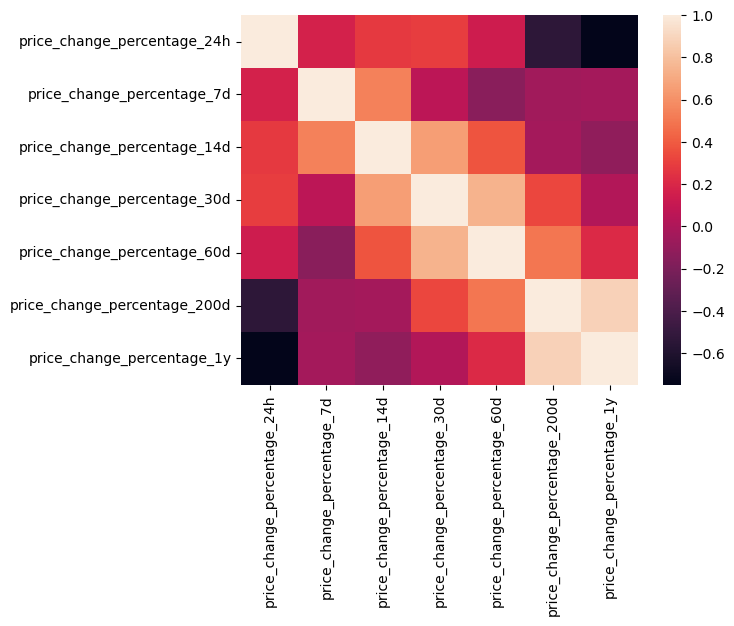

In [9]:
sns.heatmap(corrs)
plt.show()

---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.792811e+06
3,4,8.352274e+05
4,5,4.373295e+05


In [11]:
# Plot the Elbow Curve
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**   4 seems like the best value for k

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
X= df_market_data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [15]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()

df_copy['clusters'] = preds

df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['clusters']=preds

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [35]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# cluster_plot = plt.scatter(df_copy.price_change_percentage_24h, df_copy.price_change_percentage_7d, c=df_copy.clusters)
# plt.ylabel("price_change_percentage_7d")
# plt.xlabel("price_change_percentage_24h")
# plt.show()
# cluster_plot

cluster_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols=["coin_id"],
    marker=["hex", "square", "cross", "inverted_triangle"],
    title = "Cryptocurrencies Clusters Using Orignial Data",
)
cluster_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3


In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca = PCA(n_components=n_components)

# View the first five rows of the DataFrame. 
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89% is the explained variance of the 3 components

In [21]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    pca_data,
    columns=["PCA1", "PCA2", "PCA3"]
)
# Copy the crypto names from the original data
df_market_data_pca["coinid"] = df_market_data.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index("coinid")

# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data_pca)
    inertia.append(model.inertia_)


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve")

elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** number 4 is the best value for k when using PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4)


In [26]:
# Fit the K-Means model using the scaled PCA DataFrame
model_pca.fit(df_market_data_pca)

KMeans(n_clusters=4)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
crypto_clusters_pca = model_pca.predict(df_market_data_pca)
# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [28]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_predictions = df_market_data_pca.copy()
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_predictions["crypto_cluster"] = crypto_clusters_pca
# Display the copy of the scaled PCA DataFrame
df_market_data_pca_predictions.head()

,PCA1,PCA2,PCA3,crypto_cluster
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clusters_plot_pca = df_market_data_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="crypto_cluster",
    hover_cols=["coin_id"],
    marker=["hex", "square", "cross", "inverted_triangle"],
    title = "Cryptocurrencies Clusters Using PCA Data",
)
clusters_plot_pca

:NdOverlay   [crypto_cluster]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
elbow_plot + elbow_plot_pca


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [36]:
# Composite plot to contrast the clusters
cluster_plot + clusters_plot_pca

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [crypto_cluster]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** From the cluster analysis results we can see a similar result to the original data due being able to identify 4 unique clusters on the PCA graph. The PCA data shows better clustering than the original data